# 5.1. NDLラボ　ひらがな画像データ

In [1]:
# データ処理ライブラリ
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# 画像処理ライブラリ
import cv2

# 可視化ライブラリ
import matplotlib.pyplot as plt

# Keras
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

# Pythonモジュール
import os
import glob

# 表示設定
pd.options.display.max_rows = 78
pd.options.display.max_columns = 78

Using TensorFlow backend.


In [2]:
# HiraganaKey.csvの読み込み
labels = pd.read_csv('HiraganaKey.csv')
labels.head()

,文字,ディレクトリ,画像数
0,あ,U3042,"1,208"
1,い,U3044,"1,122"
2,う,U3046,"1,148"
3,え,U3048,"1,077"
4,お,U304A,"1,283"


In [3]:
# 画像データのパスを指定
path = "./hiragana73/"

In [4]:
# hiragana73内のエントリを取得
dir_list = []
for test in os.listdir(path):
    dir_list.append(test)

# 最初の5つを表示
dir_list[0:5]

['U3042', 'U3044', 'U3046', 'U3048', 'U304A']

In [5]:
# U3081（平仮名 め）の画像ファイル名を取得
me_imgs_path = path + dir_list[0]
me_file_name = sorted(glob.glob(me_imgs_path + '/' + '*.png'))
print(len(me_file_name))
me_file_name[0:5]

1208


['./hiragana73/U3042\\1900_753325_0060.png',
 './hiragana73/U3042\\1900_754949_0023.png',
 './hiragana73/U3042\\1900_758495_0075.png',
 './hiragana73/U3042\\1900_761460_0029.png',
 './hiragana73/U3042\\1900_766994_0030.png']

In [6]:
# ファイル取得用の空のリストを作成
files = []
moji = []

# 各画像データのファイル名を取得
for foldername in os.listdir(path):
    imgs_path = path + foldername
    imgs = sorted(glob.glob(imgs_path + '/' + '*.png'))
    
    for name in imgs:
        files.append(str(name))
        moji.append(str(labels['文字'][labels['ディレクトリ'] == foldername].values[0]))

files_df = pd.DataFrame({'Image':files, 'Label':moji}, index=None)

In [7]:
# データのサイズを確認
files_df.shape

(80000, 2)

Label- あ
Image Shape- (48, 48)


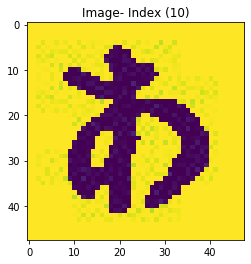

In [9]:
# 10番目のレコードの画像ファイルを読み込み
testchar = cv2.imread(files_df['Image'][10],0)

# 読み込んだ画像データを表示
plt.imshow(testchar)
print('Label-',files_df['Label'][10])
print('Image Shape-',testchar.shape)
plt.title('Image- Index (10)')
plt.show()

In [10]:
# 各画像パス名のデータをシャッフル
files_df = files_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
datalist = []

# 画像データの読み込み
for i in range(80000):
    character = cv2.imread(files_df['Image'][i],0)
    character = character.reshape(2304)
    datalist.append(character)

In [12]:
# リストからNumpy配列へ変換
charfeatures = np.array(datalist)

In [13]:
# データフレームのサイズを確認
charfeatures.shape

(80000, 2304)

In [14]:
# Numpy配列をnpyファイルとして書き出し
np.save(path + 'charfeatures.npy', charfeatures)

In [15]:
# files_dfをCSVファイルとして書き出し
files_df.to_csv(path + 'files_df.csv', index=False)

In [16]:
# charfeatures.npyを読み込み
charfeatures_load = np.load(path + 'charfeatures.npy')

# サイズを確認
print(charfeatures_load.shape)

(80000, 2304)


In [17]:
# files_df.csvを読み込み
files_df_load = pd.read_csv(path + 'files_df.csv')

# 最初の5行を表示
files_df_load.head()

,Image,Label
0,./hiragana73/U306F\1929_1452973_0089.png,は
1,./hiragana73/U306D\1914_908938_0044.png,ね
2,./hiragana73/U308F\1926_938757_0025.png,わ
3,./hiragana73/U308B\1918_1210785_0064.png,る
4,./hiragana73/U306F\1914_1239432_0055.png,は
